In [2]:
# read in the measured_times.csv file, this is julia code
using CSV, DataFrames, Statistics, StatsPlots, Distributions

# Load the dataset
df = CSV.read("measured_times.csv", DataFrame)

Row,interarrival_times,machine_times_1,machine_times_2
,Float64,Float64,Float64
1,43.2066,26.9325,45.8583
2,9.91864,35.4586,1.25434
3,66.1978,21.9253,40.2622
4,65.7656,34.65,87.1969
5,186.966,30.3615,105.435
6,33.7534,7.85452,95.8694
7,167.915,18.3148,36.0672
8,63.3114,23.4539,55.1373
9,0.316053,13.6553,1.92456


In [4]:
mean_interarrival = mean(df.interarrival_times)
mean_machine1 = mean(df.machine_times_1)
mean_machine2 = mean(df.machine_times_2)
std_machine_1 = std(df.machine_times_1)
println("Mean interarrival time: ", mean_interarrival)
println("Mean machine 1 time: ", mean_machine1)
println("Mean machine 2 time: ", mean_machine2)
println("Std machine 1 time: ", std_machine_1)


Mean interarrival time: 60.29751010233422
Mean machine 1 time: 25.055923279304153
Mean machine 2 time: 59.02852262034006
Std machine 1 time: 7.185832891717325


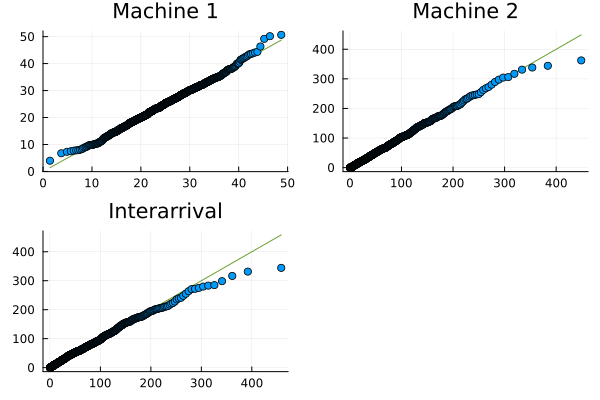

In [38]:
# now test the qqplot if the data is exponentially distributed

exp_machine_1 = Normal(mean_machine1,std_machine_1)
exp_machine_2 = Exponential(mean_machine2)
exp_interarrival = Exponential(mean_interarrival)

# divide into 3 subplots
p = plot(layout = (3,1))

p1 = qqplot(exp_machine_1, df.machine_times_1, title="Machine 1 processing time against Normal distribution: N(25.06,7.1858^2)")
p2 = qqplot(exp_machine_2, df.machine_times_2, title="Machine 2 processing time against Exponential distribution: Exp(59.03)")
p3 = qqplot(exp_interarrival, df.interarrival_times, title="Interarrival time against Exponential distribution: Exp(60.29)")

combine_plot = plot(p1,p2,p3, laytout = (3,1))

display(combine_plot)

In [ ]:
qqplot(exp_machine_1, df.machine_times_1, label="Machine 1")

In [ ]:
qqplot!(exp_interarrival, df.interarrival_times, label="Interarrival")

In [ ]:
using StatsPlots

# QQ plot for machine_1
qqplot(interarrival_machine_1, title = "QQ Plot - Machine 1", ylabel = "Quantiles of Interarrival Times", xlabel = "Theoretical Quantiles")

# QQ plot for machine_2
qqplot(interarrival_machine_2, title = "QQ Plot - Machine 2", ylabel = "Quantiles of Interarrival Times", xlabel = "Theoretical Quantiles")


In [39]:
std_machine_1

7.185832891717325